**MURA-Abnormality-Detection-in-Musculoskeletal-Radiographs**

---



# Exploratory analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.vgg16 import VGG16
from keras.models import Model
from keras import layers
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [ ]:
data_dir = '/content/drive/MyDrive/AyoubFolder/MURA-v1.1'

train_dir = data_dir + '/train' # Chemin d'accès au répertoire de train set
val_dir = data_dir + '/valid' # Chemin d'accès au répertoire de test set

ABNORMAL


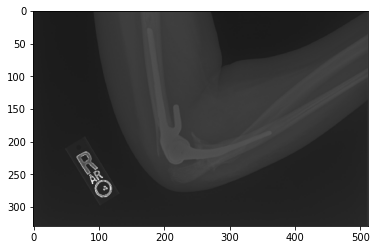

In [ ]:
# Affichage d'une image osseuse anormale
img_abnormal = load_img('/content/drive/MyDrive/AyoubFolder/MURA-v1.1/train/XR_ELBOW/patient00069/study1_positive/image2.png')
print('ABNORMAL')
plt.imshow(img_abnormal)
plt.show()

NORMAL


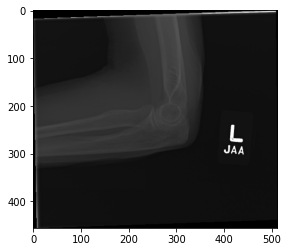

In [ ]:
# Affichage d'une image osseuse normale
img_normal = load_img('/content/drive/MyDrive/AyoubFolder/MURA-v1.1/train/XR_ELBOW/patient00011/study1_negative/image1.png')
print('NORMAL')
plt.imshow(img_normal)
plt.show()

In [ ]:
#les etudes de train set avec labels
df=pd.read_csv('/content/drive/MyDrive/AyoubFolder/MURA-v1.1/train_labeled_studies.csv', names=['Train_Image','Train_Label'])

In [ ]:
df.head(15)

,Train_Image,Train_Label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study...,1
5,MURA-v1.1/train/XR_SHOULDER/patient00006/study...,1
6,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,1
7,MURA-v1.1/train/XR_SHOULDER/patient00007/study...,0
8,MURA-v1.1/train/XR_SHOULDER/patient00008/study...,1
9,MURA-v1.1/train/XR_SHOULDER/patient00009/study...,1


0    8280
1    5177
Name: Train_Label, dtype: int64


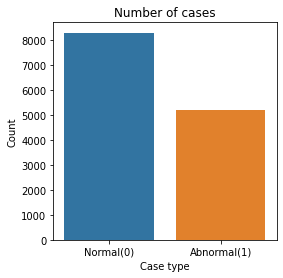

In [ ]:
# Compter les étiquettes dans le train set
cases_count = df['Train_Label'].value_counts()
print(cases_count)

# Tracer les résultats 
plt.figure(figsize=(4,4))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of cases', fontsize=12)
plt.xlabel('Case type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Abnormal(1)'])
plt.show()

In [ ]:
# Ajout d'étiquettes aux images individuelles dans le train set
df=pd.read_csv('/content/drive/MyDrive/AyoubFolder/MURA-v1.1/train_image_paths.csv', names=['Train_Image'])
names=df['Train_Image'].values
train_labels=[]

for i in names:
  if ('positive' in i):
    train_labels.append('1')
  elif('negative' in i):
    train_labels.append('0')

train_labels = np.array(train_labels)
#labels = pd.DataFrame(labels, columns=['Image', 'Label'])
df.insert(1, 'Train_Label', train_labels)
df.to_csv('Train_set.csv', index=False)


In [ ]:
df.head(20)

,Train_Image,Train_Label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
5,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1
6,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
7,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
8,MURA-v1.1/train/XR_SHOULDER/patient00003/study...,1
9,MURA-v1.1/train/XR_SHOULDER/patient00004/study...,1


0    21935
1    14873
Name: Train_Label, dtype: int64


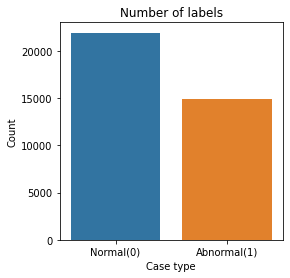

In [ ]:
# Compter le nombre d'étiquettes individuelles des images dans le train set
cases_count = df['Train_Label'].value_counts()
print(cases_count)

# Tracer les résultats
plt.figure(figsize=(4,4))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of labels', fontsize=12)
plt.xlabel('Case type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Abnormal(1)'])
plt.show()

In [ ]:
#les etudes d'ensembles de validation avec labels
df=pd.read_csv('/content/drive/MyDrive/AyoubFolder/MURA-v1.1/valid_labeled_studies.csv', names=['Valid_Image','Valid_Label'])


In [ ]:
df.head(20)

,Valid_Image,Valid_Label
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_p...,1
5,MURA-v1.1/valid/XR_WRIST/patient11188/study1_p...,1
6,MURA-v1.1/valid/XR_WRIST/patient11189/study1_p...,1
7,MURA-v1.1/valid/XR_WRIST/patient11190/study1_p...,1
8,MURA-v1.1/valid/XR_WRIST/patient11191/study1_p...,1
9,MURA-v1.1/valid/XR_WRIST/patient11192/study1_p...,1


0    661
1    538
Name: Valid_Label, dtype: int64


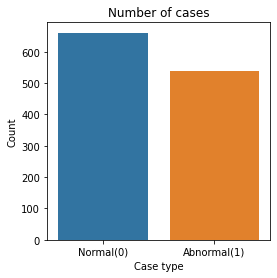

In [ ]:
# Compter les étiquettes dans le jeu de validation
cases_count = df['Valid_Label'].value_counts()
print(cases_count)

# Tracer les résultats 
plt.figure(figsize=(4,4))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of cases', fontsize=12)
plt.xlabel('Case type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Abnormal(1)'])
plt.show()

In [ ]:
# Ajout d'étiquettes aux images individuelles dans le jeu de validation
df=pd.read_csv('/content/drive/MyDrive/AyoubFolder/MURA-v1.1/valid_image_paths.csv', names=['Valid_Image'])
names=df['Valid_Image'].values
valid_labels=[]

for i in names:
  if ('positive' in i):
    valid_labels.append('1')
  elif('negative' in i):
    valid_labels.append('0')

valid_labels = np.array(valid_labels)
#labels = pd.DataFrame(labels, columns=['Image', 'Label'])
df.insert(1, 'Valid_Label', valid_labels)
df.to_csv('Valid_set.csv', index=False)

In [ ]:
df.head(20)

,Valid_Image,Valid_Label
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
5,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1
6,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
7,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
8,MURA-v1.1/valid/XR_WRIST/patient11186/study2_p...,1
9,MURA-v1.1/valid/XR_WRIST/patient11186/study3_p...,1


0    1667
1    1530
Name: Valid_Label, dtype: int64


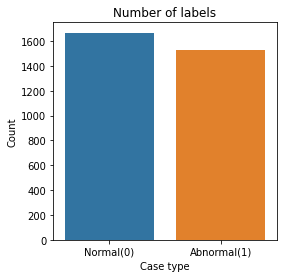

In [ ]:
# Compter le nombre d'étiquettes individuelles des images dans l'ensemble de validation
cases_count = df['Valid_Label'].value_counts()
print(cases_count)

# Tracer les résultats 
plt.figure(figsize=(4,4))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of labels', fontsize=12)
plt.xlabel('Case type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Abnormal(1)'])
plt.show()

In [ ]:
# Lire les fichiers .csv de training set et de valid set
train_df = pd.read_csv("/content/drive/MyDrive/AyoubFolder/Train_set.csv", dtype=str)
valid_df = pd.read_csv("/content/drive/MyDrive/AyoubFolder/Valid_set.csv", dtype=str)


print(train_df.shape)
print(valid_df.shape)


(36808, 2)
(3197, 2)


# **Image Preprocessing and augmentation**

In [ ]:
# Image Preprocessing
datagen = ImageDataGenerator(rescale=1./255, rotation_range=30)

train_generator = datagen.flow_from_dataframe(dataframe=train_df, directory=None,
                                              x_col="Train_Image", y_col="Train_Label",
                                              target_size=(224,224), class_mode="binary",
                                              batch_size=16, validate_filenames=False)

valid_generator = datagen.flow_from_dataframe(dataframe=valid_df, directory=None,
                                              x_col="Valid_Image", y_col="Valid_Label",
                                              target_size=(224,224), class_mode="binary",
                                              batch_size=16, shuffle=True, validate_filenames=False)

Found 36808 non-validated image filenames belonging to 2 classes.
Found 3197 non-validated image filenames belonging to 2 classes.


In [ ]:
print(train_generator.n)
print(valid_generator.n)

36808
3197


# **Densenet169 pre-trained model**




In [ ]:
#Import densenet169 pre-trained model
dense_model = DenseNet169(include_top=True, weights='imagenet')


58548224/58541896 [==============================] - 0s 0us/step


In [ ]:
dense_model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [ ]:
dense_model.layers.pop()

In [ ]:
# Compile the model
predictions = Dense(1, activation='sigmoid')(dense_model.layers[-1].output)
model = Model(inputs=dense_model.input, outputs=predictions)

model.compile(optimizer = Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# Number of train and validation steps
train_steps=train_generator.n//train_generator.batch_size
valid_steps=valid_generator.n//valid_generator.batch_size

In [ ]:
print(train_steps)
print(valid_steps)

2300
199


In [ ]:
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', save_best_only=True, verbose=1, mode='max')



In [ ]:
# history = model.fit_generator(generator=train_generator,
#                     steps_per_epoch=train_steps,
#                     validation_data=valid_generator,
#                     validation_steps=valid_steps,
#                     epochs=15,
#                     callbacks=[checkpoint])


# **VGG pre-trained model**

In [ ]:
import tensorflow as tf 
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
model.summary()

In [ ]:
# vgghist = model.fit(train_generator, validation_data = valid_generaator, steps_per_epoch = train_steps, epochs = 15)

# **ResNet pre-trained model**

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")


94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [ ]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
# resnet_history = base_model.fit(train_generator, validation_data = valid_generator, steps_per_epoch = train_steps, epochs = 15)

# **InceptionV3 pre-trained model**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (224, 224,3), include_top = False, weights = 'imagenet')


87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
# inc_history = model.fit_generator(train_generator, validation_data = valid_generator, steps_per_epoch=train_steps, epochs = 15, validation_steps=valid_steps, verbose = 1)

**Implementing Attention Augmented Convolutional Networks using Pytorch**

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import cv2
from skimage.transform import rescale, resize
from tensorflow import keras
import numpy as np
from sklearn.utils import class_weight
# import tensorflow_addons as tfa
import pickle
from skimage.io import imread
from sklearn.utils import shuffle
from matplotlib import pyplot as plt


In [ ]:
#To get the filenames for a task
def filenames(part,train=True):
    root='/content/drive/MyDrive/AyoubFolder/MURA-v1.1/'
    if train:
        csv_path="/content/drive/MyDrive/AyoubFolder/MURA-v1.1/train_image_paths.csv"
    else:
        csv_path="/content/drive/MyDrive/AyoubFolder/MURA-v1.1/valid_image_paths.csv"
    
    with open(csv_path, 'rb') as F:
        d = F.readlines()
        if part == 'all':
            imgs = [root + str(x, encoding='utf-8').strip() for x in d]
        else:
            imgs = [root + str(x, encoding='utf-8').strip() for x in d if
                            str(x, encoding='utf-8').strip().split('/')[2] == part]

    #imgs= [x.replace("/", "\\") for x in imgs]
    labels= [x.split('_')[-1].split('/')[0] for x in imgs]
    return imgs,labels


#To icrop a image from center
def crop_center(img,cropx,cropy):
    y,x,_ = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]



Data augmentation


In [ ]:
from albumentations import (
    Compose, HorizontalFlip, CLAHE, HueSaturationValue,
    RandomBrightness, RandomContrast, RandomGamma,
    ToFloat, ShiftScaleRotate
)
from albumentations.augmentations.transforms import Resize
AUGMENTATIONS_TRAIN = Compose([
    HorizontalFlip(p=0.5),
    RandomContrast(limit=0.2, p=0.5),
    RandomGamma(gamma_limit=(80, 120), p=0.5),
    RandomBrightness(limit=0.2, p=0.5),
    ShiftScaleRotate(
        shift_limit=0.0625, scale_limit=0.1, 
        rotate_limit=15, border_mode=cv2.BORDER_REFLECT_101, p=0.8), 
    ToFloat(max_value=255)
])
AUGMENTATIONS_TEST = Compose([
    # CLAHE(p=1.0, clip_limit=2.0),
    ToFloat(max_value=255)
])



Plotting the augmentation

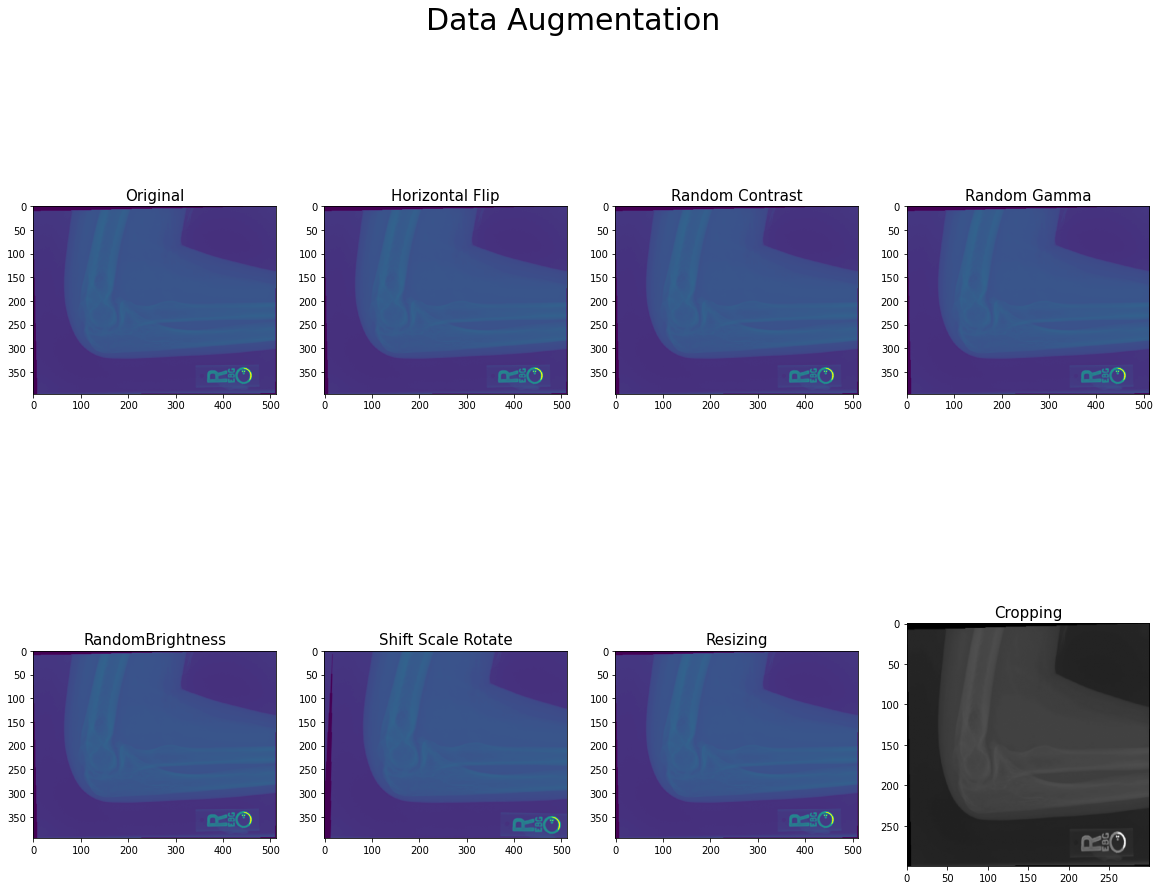

In [ ]:
albumentation_list =  [
    HorizontalFlip(p=0.5),
    RandomContrast(limit=0.2, p=0.5),
    RandomGamma(gamma_limit=(80, 120), p=0.5),
    RandomBrightness(limit=0.2, p=0.5),
    ShiftScaleRotate(
        shift_limit=0.0625, scale_limit=0.1, 
        rotate_limit=15, border_mode=cv2.BORDER_REFLECT_101, p=0.8), 
    ToFloat(max_value=255)
]
root='/content/drive/MyDrive/AyoubFolder/'
chosen_image= imread(root+'MURA-v1.1/train/XR_ELBOW/patient01055/study1_positive/image3.png')
img_matrix_list = []
bboxes_list = []
for aug_type in albumentation_list:
    img = aug_type(image = chosen_image)['image']
    img_matrix_list.append(img)
img= resize(chosen_image,(300,300,3))
img_matrix_list.append(img)
img_matrix_list.append(crop_center(img,224,224))

img_matrix_list.insert(0,chosen_image)    

titles_list = ["Original","Horizontal Flip","Random Contrast","Random Gamma","RandomBrightness",
               "Shift Scale Rotate","Resizing", "Cropping"]

def plot_multiple_img(img_matrix_list, title_list, ncols, main_title="Data Augmentation"):
    fig, myaxes = plt.subplots(figsize=(20, 15), nrows=2, ncols=ncols, squeeze=True)
    fig.suptitle(main_title, fontsize = 30)
    #fig.subplots_adjust(wspace=0.3)
    #fig.subplots_adjust(hspace=0.3)
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize=15)
    plt.show()
    
plot_multiple_img(img_matrix_list, titles_list, ncols = 4)





Creating data generator for training and testing with augmentation


In [ ]:
class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, image_filenames, labels, batch_size,transform) :
    self.image_filenames = image_filenames
    self.labels = labels
    self.batch_size = batch_size
    self.t= transform
    
  def __len__(self) :
    return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    x=[]
    for file in batch_x:
        img= imread(file)
        img= self.t(image=img)["image"]
        img= resize(img,(300,300,3))
        img= crop_center(img,224,224)
        x.append(img)
    x=np.array(x)/255.0
    y= np.array(batch_y)
    return x,y



Getting data using the utility functions

In [ ]:
part='XR_WRIST'
imgs,labels= filenames(part=part)
vimgs,vlabels= filenames(part=part,train=False)
print(labels.count('positive'),labels.count('negative'))
training_data= labels.count('positive')+labels.count('negative')
print("Training Data: ", training_data)
y_data= [0 if x=='positive' else 1 for x in labels]
y_data= keras.utils.to_categorical(y_data)
print(vlabels.count('positive'),vlabels.count('negative'))
validation_data= vlabels.count('positive')+vlabels.count('negative')
print("Validation Data: ", validation_data)
vy_data= [0 if x=='positive' else 1 for x in vlabels]
vy_data= keras.utils.to_categorical(vy_data)


3987 5765
Training Data:  9752
295 364
Validation Data:  659


Calculate class-weight to avoid class-imbalance 

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(y_data, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

Create Training and Test daat generator

In [ ]:
batch_size = 32
imgs, y_data = shuffle(imgs, y_data)
#vimgs, vy_data = shuffle(vimgs, vy_data)
my_training_batch_generator = My_Custom_Generator(imgs, y_data, batch_size,AUGMENTATIONS_TRAIN)
my_validation_batch_generator = My_Custom_Generator(vimgs, vy_data, batch_size,AUGMENTATIONS_TEST)


Training callbacks

In [ ]:
part='XR_WRIST'
checkpoint_path = root+"MURA-v1.1/"+part+"/WRIST.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
my_callbacks = [
    keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=0, save_best_only=True,
                                       save_weights_only=False, mode='auto'),
    keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1,patience=3,
                                         min_delta=0.001, verbose=1, min_lr=0.000000001)]

Create a model

In [ ]:
Inception=keras.applications.InceptionResNetV2(include_top=False,input_shape=(224,224,3))
#for layer in Inception.layers[:4]:
#  layer.trainable=False
input_image=keras.layers.Input((224,224,3))
x=Inception (input_image)

#x=keras.layers.GlobalAveragePooling2D()(x)
x=keras.layers.Flatten()(x)
#x=keras.layers.Dense(1024)(x)
#x=keras.layers.Activation(activation='relu')(x)
#x= keras.layers.Dropout(0.5)(x)
x=keras.layers.Dense(256)(x)
x=keras.layers.Activation(activation='relu')(x)
x= keras.layers.Dropout(0.5)(x)
x=keras.layers.Dense(2)(x)
out=keras.layers.Activation(activation='softmax')(x)

model=keras.Model(inputs=input_image,outputs=out)
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

219062272/219055592 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 38400)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               9830656   
_________________________________________________________________
activation_203 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
____________________________________________________________

Training

In [ ]:
history=model.fit_generator(generator=my_training_batch_generator,
                   steps_per_epoch = int(training_data // batch_size),
                   epochs = 30,
                   verbose = 1,
                   class_weight=d_class_weights,
                   validation_data = my_validation_batch_generator,
                   validation_steps = int(validation_data // batch_size),
                   callbacks=my_callbacks)